# 如何控管不同版本別的資料

### 同樣是損益，就有這些版本：

### 強制公告=>每月公告=>法說會(財測)=>公開資訊觀測站公告=>PDF檔  
  
強制公告(因營運問題被交易所要求)、每月公告：沒經過會計師查核  
  
法說會：一般沒經過會計師查核，但通常差不多才會在法說會說  
  
公開資訊觀測站公告：董事會通過(董事會拿到查核後報告，但散戶還沒)  

券商財務預估：時間點不定，甚至一間券商會對同一間公司作多次預估
  
PDF檔：看公司什麼時候上傳，以前有落差(季報15，年報30天)，現在董事會通過當日，PDF檔就要上傳。

# 預測營收/盈餘，要怎麼處理？

#### 這邊示範如何將券商預估財務狀況的資料進行整理、運用

In [3]:
import pandas
import numpy
# 讀取範例資料，裡面是各家券商的預估營收/利益的資料
forecast = pandas.read_csv('forecast1.csv')
forecast['coid'] = forecast['coid'].astype(str)
#建議將日期都以這種方式轉換成datetime64，可以消除累贅的字詞
forecast['mdate'] = forecast['mdate'].astype(str).astype('datetime64')
forecast['zdate'] = forecast['zdate'].astype(str).astype('datetime64')
forecast

,coid,簡稱,mdate,券商,zdate,預估營收,預估營業毛利,預估營業毛利率,預估營業利益,預估營業利益率,...,預估稅前淨利率,預估稅後淨利,預估稅後淨利率,預估稅後EPS,預估營收成長率,預估稅前盈餘成長率,預估稅後淨利成長率,預估營收調整%,預估稅前盈餘調整%,預估稅後淨利調整%
0,1101,台泥,2019-06-01,ABSCXYZ,2018-11-20,34412.0,10296.0,29.92,8920.0,25.92,...,28.53,6689.0,19.44,1.31,3.27,-0.05,-5.31,0.00,0.00,0.00
1,1101,台泥,2019-06-01,ACAPXYZ,2018-01-18,26945.0,5833.0,21.65,4347.0,16.13,...,16.69,3075.0,11.41,0.72,-19.14,-54.22,-56.47,0.00,0.00,0.00
2,1101,台泥,2019-06-01,ACAPXYZ,2018-08-13,30536.0,10553.0,34.56,9049.0,29.63,...,31.50,7001.0,22.93,1.37,-8.36,-2.07,-0.90,13.33,113.90,127.67
3,1101,台泥,2019-06-01,ACAPXYZ,2018-11-20,30536.0,10553.0,34.56,9049.0,29.63,...,32.09,7181.0,23.52,1.41,-8.36,-0.24,1.65,-96.95,1.87,2.57
4,1101,台泥,2019-06-01,ACAPXYZ,2019-03-20,28688.0,8564.0,29.85,7175.0,25.01,...,29.09,6092.0,21.24,1.15,-13.90,-15.04,-13.77,-6.05,-14.84,-15.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23193,9958,世紀鋼,2020-03-01,ACAPXYZ,2020-03-02,1100.0,242.0,22.00,177.0,16.09,...,14.82,114.0,10.36,0.54,174.43,1027.95,692.49,10.00,8.67,6.54
23194,9958,世紀鋼,2020-03-01,ANSCXYZ,2020-03-13,1200.0,241.0,20.08,161.0,13.42,...,13.17,125.0,10.42,0.60,199.38,993.35,768.96,0.00,0.00,0.00
23195,9958,世紀鋼,2020-03-01,APCSXYZ,2019-12-26,984.0,247.0,25.10,148.0,15.04,...,14.63,103.0,10.47,0.49,145.49,896.47,616.02,0.00,0.00,0.00
23196,9958,世紀鋼,2020-03-01,ATASXYZ,2019-08-19,901.0,260.0,28.86,188.0,20.87,...,18.31,115.0,12.76,0.55,124.79,1041.79,699.44,0.00,0.00,0.00


### 從最新一次預測資料，找出平均預測值
#### 接著從預測資料中，依照財報季別分組平均
#### 需要注意的是，如果一間券商發佈多次財測，就會導致他在分組平均時的權重變大

In [4]:
# 查看最後一季估計資料的各家券商平均
print(forecast['mdate'].max())
latest_forecast = forecast.loc[forecast['mdate']==forecast['mdate'].max(),['coid','券商','zdate','預估營收']].dropna().reset_index(drop=True)
# 計算groupby營收
latest_forecast_avg = latest_forecast.groupby(['coid'],as_index=False)['預估營收'].max()
latest_forecast_avg

2020-03-01 00:00:00


,coid,預估營收
0,1101,35215.0
1,1102,22146.0
2,1103,471.0
3,1104,1322.0
4,1201,4822.0
...,...,...
642,9940,2518.0
643,9941,7483.0
644,9942,747.0
645,9951,1589.0


#### 也可以像下面這樣，只取出各券商對每間公司的最後一次財測，然後再分組平均避免問題

In [5]:
# 查看最後一季估計資料的各家券商最新一次預估的平均
print(forecast['mdate'].max())
latest_forecast = forecast.loc[forecast['mdate']==forecast['mdate'].max(),['coid','券商','zdate','預估營收']].dropna().reset_index(drop=True)
# 取得各券商最後一筆預估日
latest_forecast_zdate = latest_forecast.groupby(['coid','券商'],as_index=False)['zdate'].max()
# 以最後一筆預估日為主體做合併
latest_forecast_zdate = latest_forecast_zdate.merge(latest_forecast,on=['coid','券商','zdate'],how='left')
# 計算groupby營收
latest_forecast_zdate_avg = latest_forecast_zdate.groupby(['coid'],as_index=False)['預估營收'].mean()
latest_forecast_zdate_avg

2020-03-01 00:00:00


,coid,預估營收
0,1101,24876.000000
1,1102,16156.857143
2,1103,471.000000
3,1104,1285.000000
4,1201,4486.000000
...,...,...
642,9940,2401.500000
643,9941,7304.500000
644,9942,747.000000
645,9951,1460.285714


### 與實際值比較


In [7]:
# 實際值
actual_data = pandas.read_csv('actual.csv')
actual_data['coid'] = actual_data['coid'].astype(str)
actual_data = actual_data.merge(latest_forecast_zdate_avg,on=['coid'],how='left').dropna()
actual_data

,mdate,coid,月營收(累計),預估營收
7,2020-03-01 00:00:00+00:00,1216,108264.865,113400.000000
18,2020-03-01 00:00:00+00:00,1304,11356.370,13244.400000
21,2020-03-01 00:00:00+00:00,1310,1698.252,2758.333333
29,2020-03-01 00:00:00+00:00,1326,64444.053,82198.142857
30,2020-03-01 00:00:00+00:00,1402,52235.614,59888.666667
...,...,...,...,...
4294,2020-03-01 00:00:00+00:00,8454,15105.707,14684.285714
4302,2020-03-01 00:00:00+00:00,8480,498.677,573.000000
4326,2020-03-01 00:00:00+00:00,9924,1757.643,1948.000000
4334,2020-03-01 00:00:00+00:00,9938,4588.285,4176.200000


# 附錄：發佈在公開資訊的公告自結損益

### 因營業狀況被要求強制公告
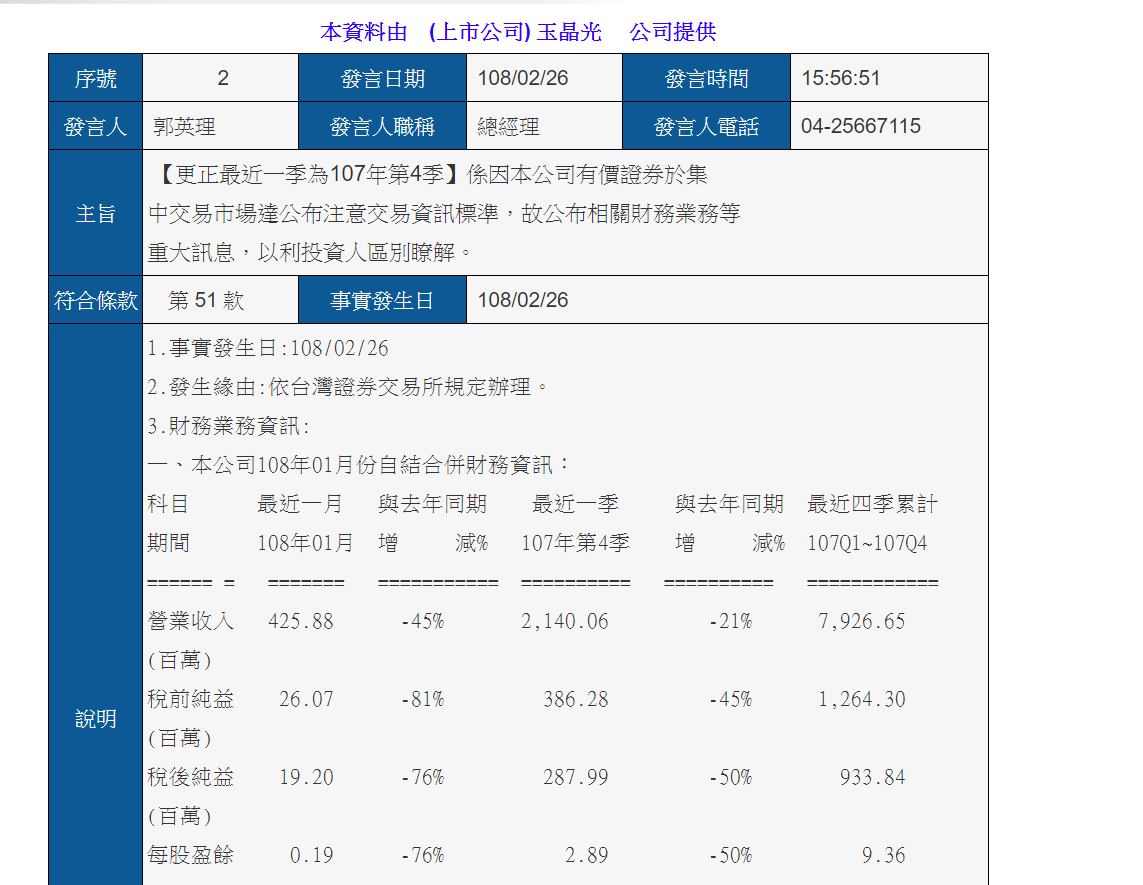

### 自結損益 - 1  
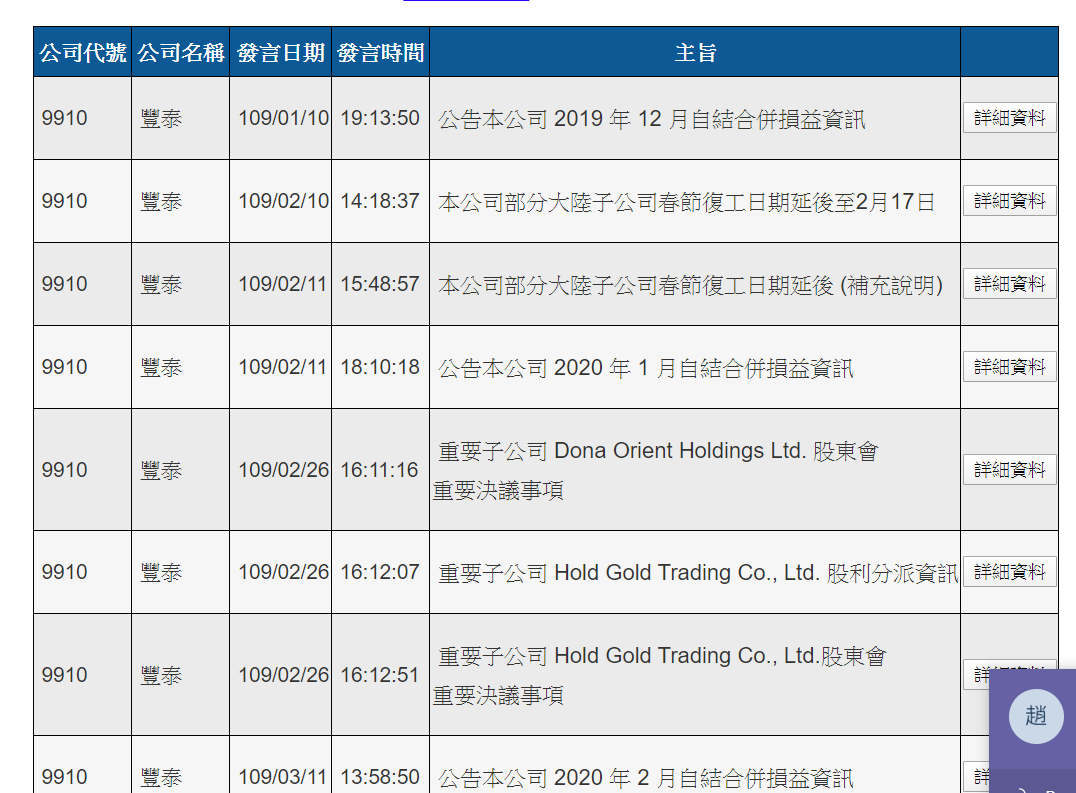

### 自結損益 - 2
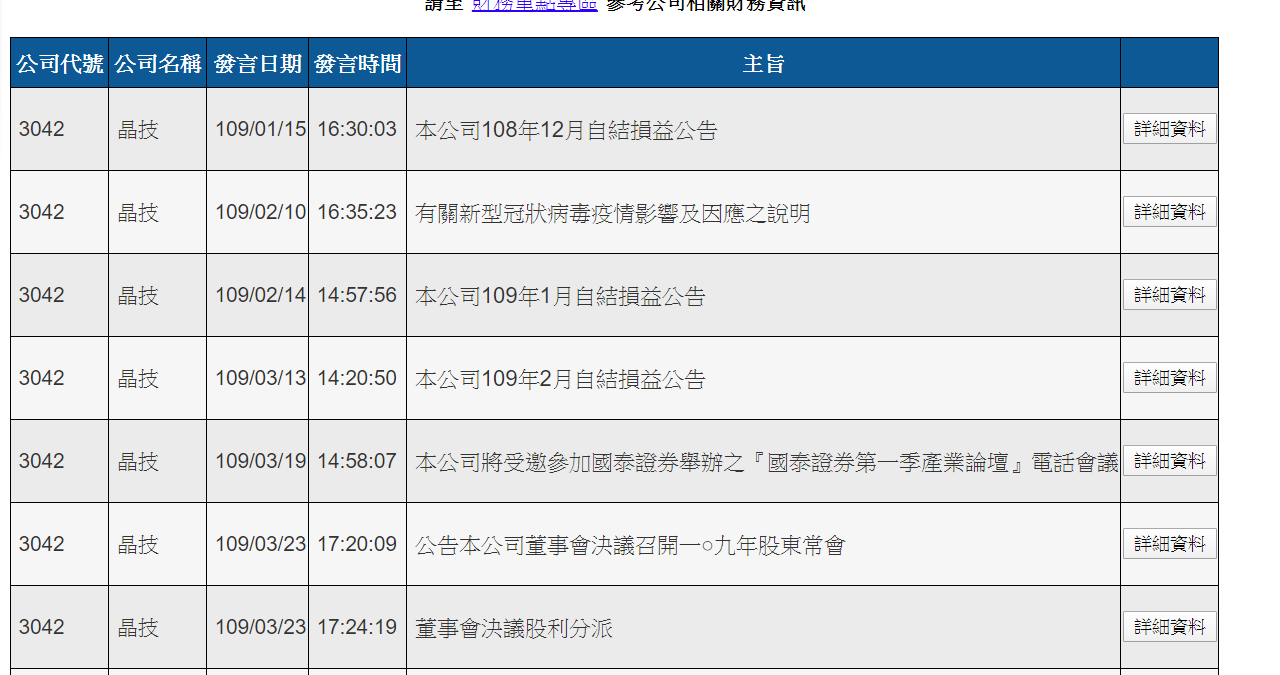